# Visa EDA

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")


## Phase 1: Data Collection and Preparation

In [2]:
def load_data(url):
    init_data = pd.read_csv(url, sep = ",")
    data = init_data.copy()
    return data

In [3]:
df = load_data("https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/EasyVisa%20(1).csv")


In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Handling missing values

In [6]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.sum()>0:
        print(missing_values[missing_values > 0])
    else:
        print("No missing values")

def check_duplicates(df):
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"Percentage of duplicates: {(duplicates/len(duplicates))*100:.2f}%")
    else:
        print("There are no duplicates")

In [7]:
check_missing_values(df)
check_duplicates(df)

No missing values
There are no duplicates


In [8]:
# #Handling missing_values
# def handle_missing_values(df):
#     if df.select_dtypes(include=["number"]):
#         df[] = df[].fillna(df[].median())
#     else:
#         df[] = df[].fillna(df[].mode.iloc[0])

## Phase 2: Exploratory Data Analysis (EDA)

In [11]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [60]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [38]:
# cat_col = df.select_dtypes(include=["object"]).columns
# cat_col = list(cat_col.drop("case_id"))
# for col in cat_col:
#     print(df[col].value_counts())
#     print("*"*40)

### Univariate analysis

In [9]:
df.columns


Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [54]:
def categorical_numerical(df):
    num_col = df.select_dtypes(include=["number"]).columns
    cat_col = df.select_dtypes(include=["object"]).columns
    cat_col = cat_col.drop('case_id') #considering dropping soon

    return num_col, cat_col

In [55]:
numerical_features, categorical_features = categorical_numerical(df)

In [57]:
# categorical_features = categorical_features.drop("case_id")
for col in categorical_features:
    print(df[col].value_counts())
    print("*"*40)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
****************************************
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
****************************************
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
****************************************
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
****************************************
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
****************************************
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
****************************************
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
********

In [53]:
categorical_features

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [45]:
# numerical_features = df.select_dtypes(include=["number"]).columns
# numerical_features

In [46]:
def univariate_numerical_eda(df, column):
    
    print()
    print("*"*40)
    print(f"Feature: {column}")
    print("*"*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    #histogram and KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde = True, bins=30, color= 'green')
    plt.title(f"\nDistribution of {column}", fontsize = 13)
    plt.xlabel(column)
    plt.ylabel("Frequency")

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='green')
    plt.title(f"\nBoxplot of {column}", fontsize=13)

    plt.tight_layout()
    plt.show()

    if df[column].mean() > df[column].median():
        print(f"\n{column} is right skewed. Consider log or Box-cox transformation")
    elif df[column].mean() < df[column].median():
        print(f"\n{column} is left skewed. Consider Square Transformation or Exponential transformation")
    else:
        print(f"\n{column} is fairly symmetric")


****************************************
Feature: no_of_employees
****************************************
       no_of_employees
count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000

Skewness: 12.265260
Kurtosis: 206.335


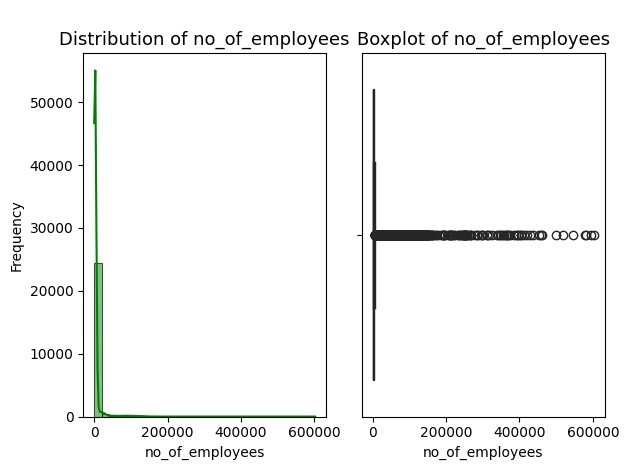


no_of_employees is right skewed. Consider log or Box-cox transformation

****************************************
Feature: yr_of_estab
****************************************
        yr_of_estab
count  25480.000000
mean    1979.409929
std       42.366929
min     1800.000000
25%     1976.000000
50%     1997.000000
75%     2005.000000
max     2016.000000

Skewness: -2.037301
Kurtosis: 3.507


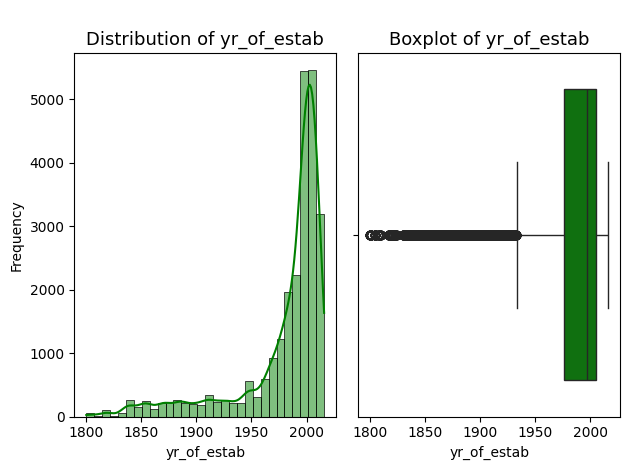


yr_of_estab is left skewed. Consider Square Transformation or Exponential transformation

****************************************
Feature: prevailing_wage
****************************************
       prevailing_wage
count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000

Skewness: 0.755776
Kurtosis: 0.824


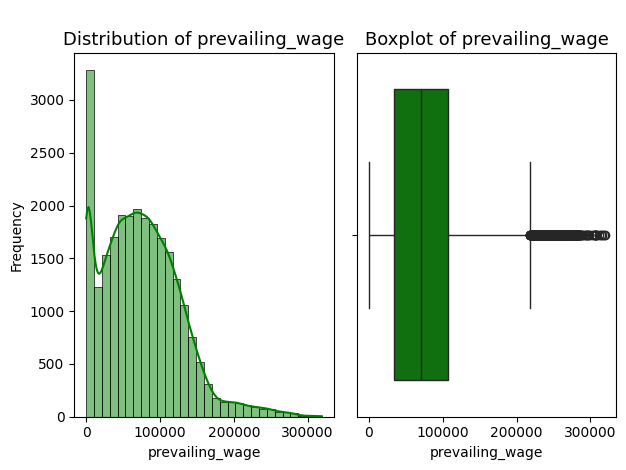


prevailing_wage is right skewed. Consider log or Box-cox transformation


In [47]:
for col in numerical_features:
    univariate_numerical_eda(df, col)

In [67]:
def histogram_boxplot(df, column, figsize=(12, 8), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex = True,
        gridspec_kw= {"height_ratios": {0.25, 0.75}},
        figsize = figsize,
    )

    sns.boxplot(
        data=df, x=column, ax= ax_box2, showmeans=True, color ='blue'
    )

    sns.histplot(
        data = df, x = column, kde=kde, ax = ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data = df, x = column, kde=kde, ax=ax_hist2
    )

    ax_hist2.axvline(
        df[column].mean(), color = 'green', linestyle="--"
    )

    ax_hist2.axvline(
        df[column].median(), color = 'black', linestyle="-"
    )

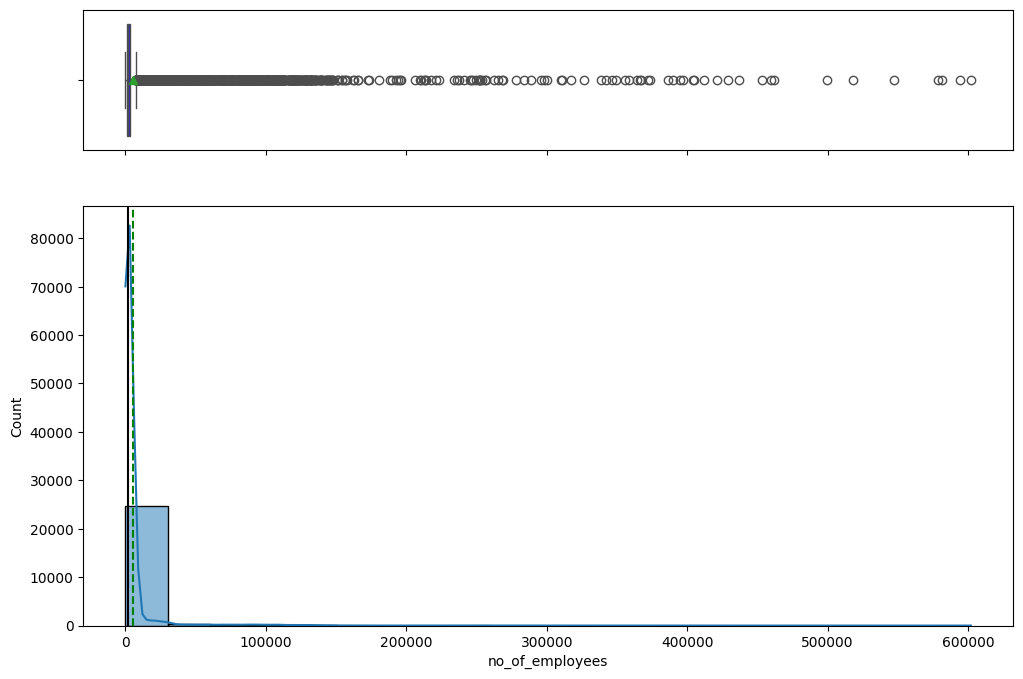

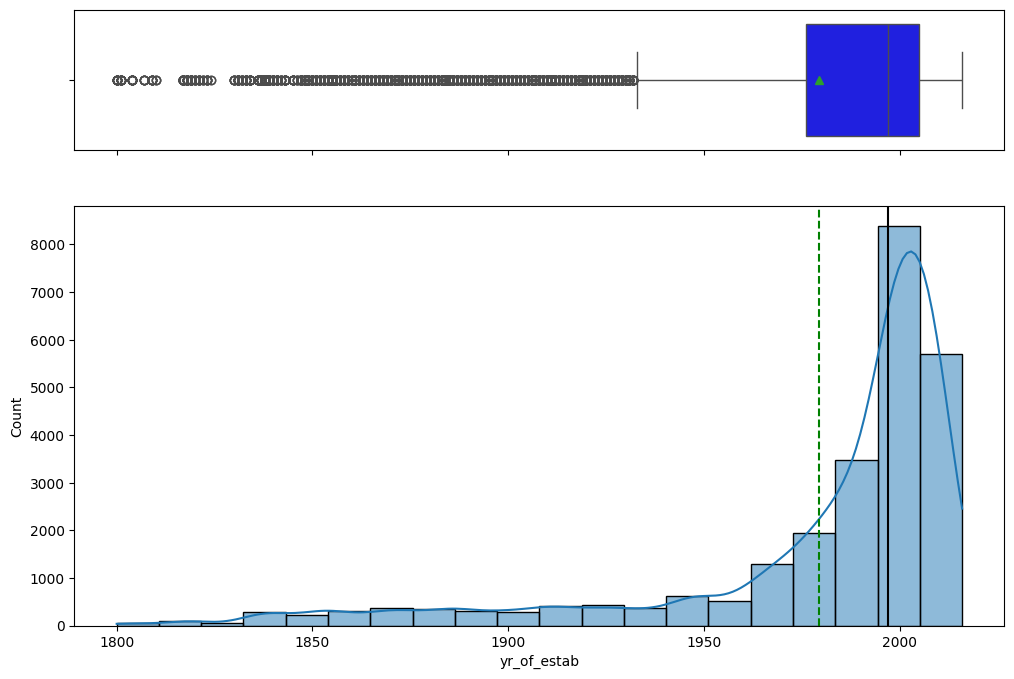

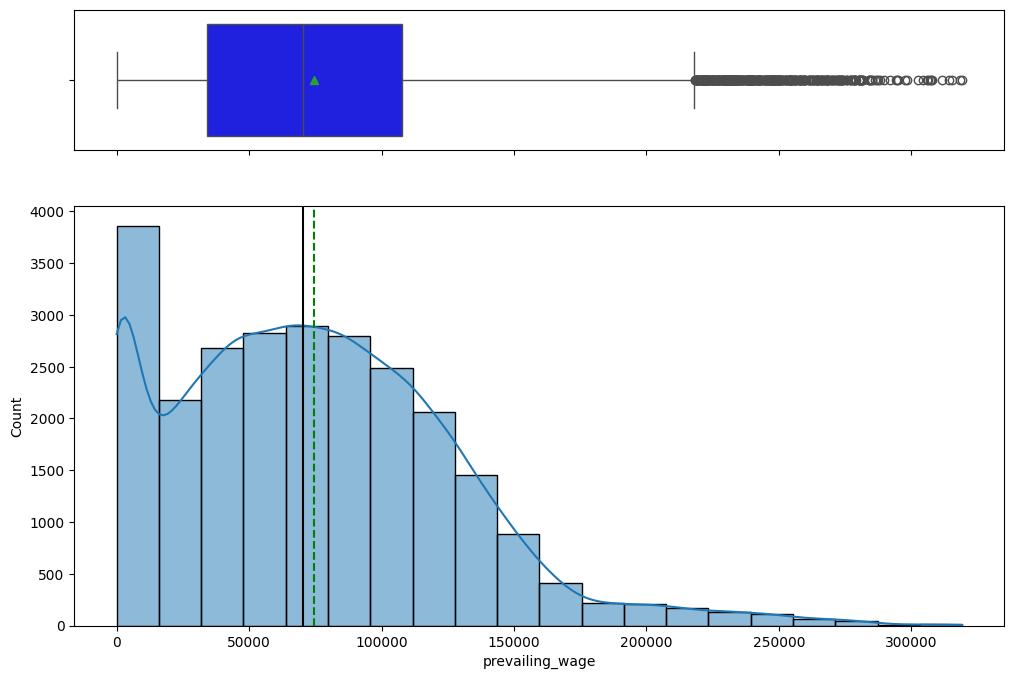

In [68]:
for col in numerical_features:
    histogram_boxplot(df, col, kde=True, bins=20)

**Insights from Histogram and Boxplot Visualization**
<br>


In [72]:
def univariate_categorical_eda(df, column):
     
    print("="*40)
    print(f"Feature: {column}")
    print("="*40)

    #Frequency and proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True)* 100
    summary = pd.DataFrame({'Count': freq, "Percentage": prop.round(2)})
    print(f"{summary}\n")

    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')
    plt.title(f"Distribuiton of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Count")

    #Adding percentages
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f"{(height/total)*100:.1f}%", ha = 'center')
    plt.tight_layout()
    plt.show()

Feature: continent
               Count  Percentage
continent                       
Asia           16861       66.17
Europe          3732       14.65
North America   3292       12.92
South America    852        3.34
Africa           551        2.16
Oceania          192        0.75



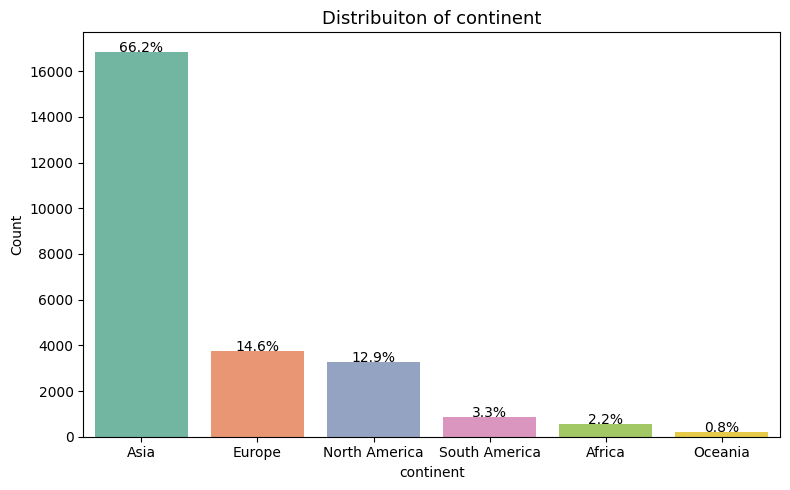

Feature: education_of_employee
                       Count  Percentage
education_of_employee                   
Bachelor's             10234       40.16
Master's                9634       37.81
High School             3420       13.42
Doctorate               2192        8.60



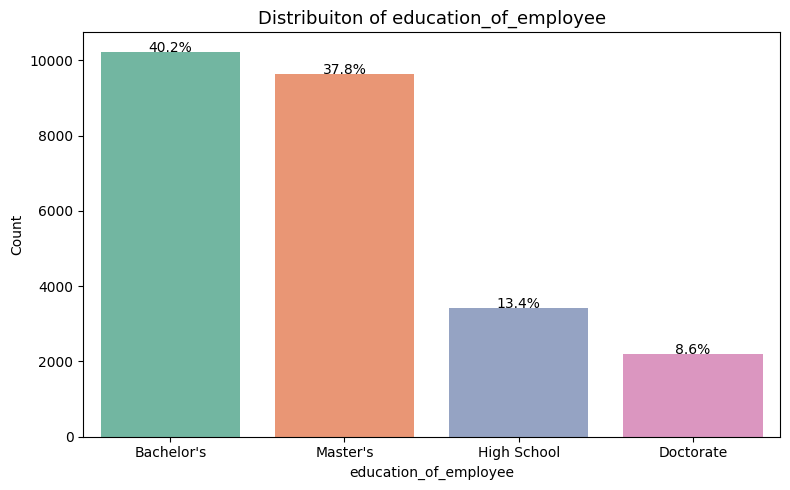

Feature: has_job_experience
                    Count  Percentage
has_job_experience                   
Y                   14802       58.09
N                   10678       41.91



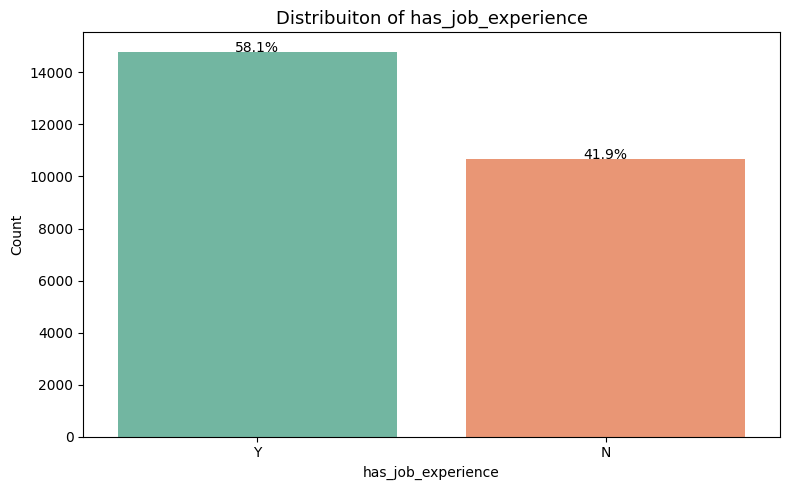

Feature: requires_job_training
                       Count  Percentage
requires_job_training                   
N                      22525        88.4
Y                       2955        11.6



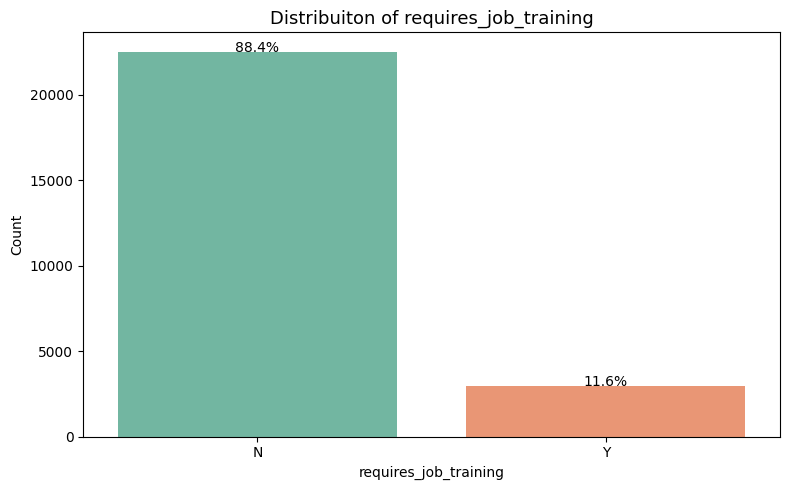

Feature: region_of_employment
                      Count  Percentage
region_of_employment                   
Northeast              7195       28.24
South                  7017       27.54
West                   6586       25.85
Midwest                4307       16.90
Island                  375        1.47



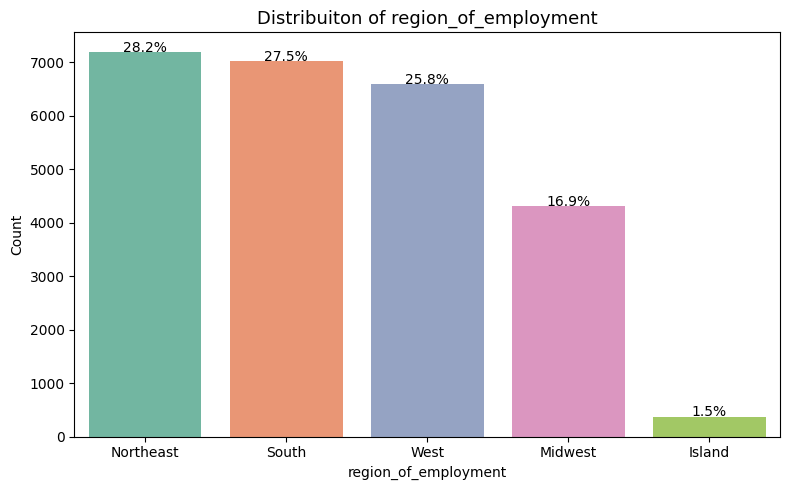

Feature: unit_of_wage
              Count  Percentage
unit_of_wage                   
Year          22962       90.12
Hour           2157        8.47
Week            272        1.07
Month            89        0.35



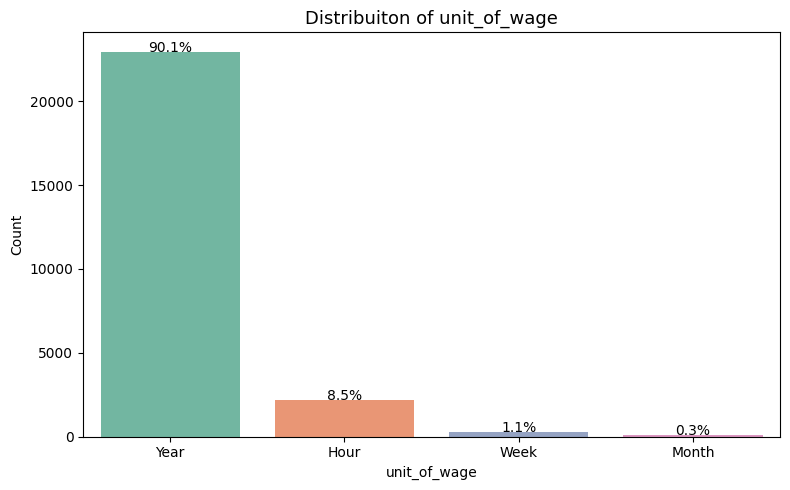

Feature: full_time_position
                    Count  Percentage
full_time_position                   
Y                   22773       89.38
N                    2707       10.62



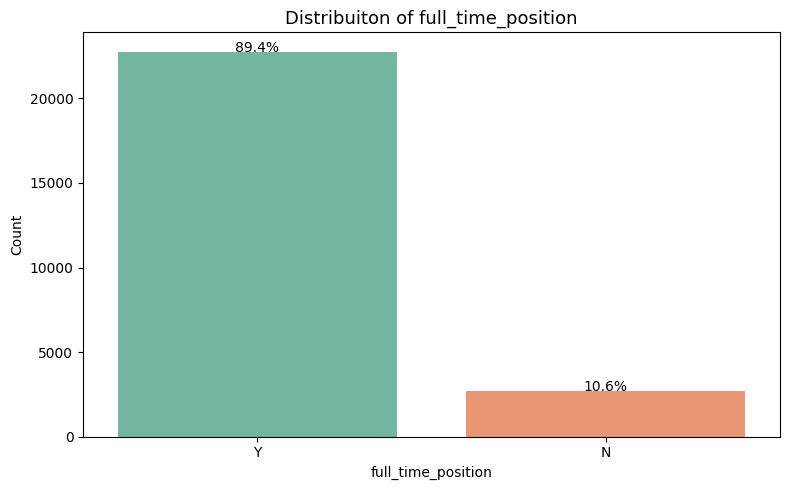

Feature: case_status
             Count  Percentage
case_status                   
Certified    17018       66.79
Denied        8462       33.21



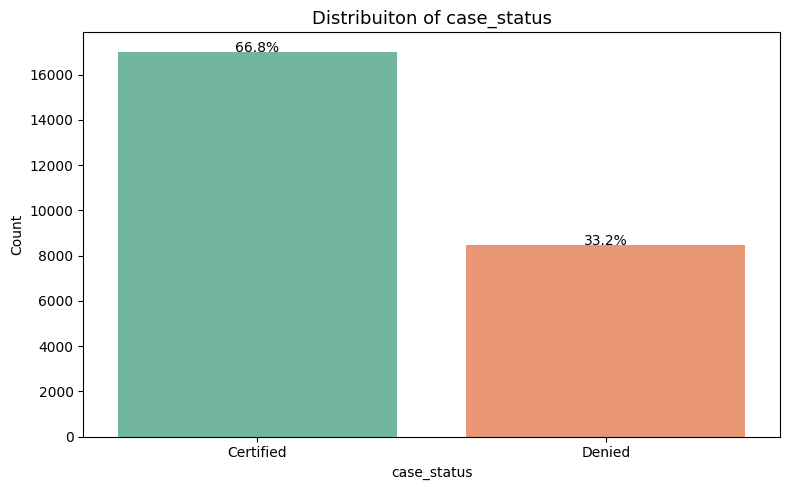

In [73]:
for col in categorical_features:
    univariate_categorical_eda(df, col)

### Bivariate Analysis

Task 2.2: Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.

In [104]:
def target_and_features_numeric(df, target, col):

    #Encoding Loan status since it is categorical
    df_copy = df.copy()
    le = LabelEncoder()
    df_copy["case_status"] = le.fit_transform(df_copy["case_status"])

    #Calculating correlation
    corr, p_value = pearsonr(df_copy[target], df[col])

    #Creating plot
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df_copy, x=target, y=col, palette = 'Set2', legend ='auto' )

    plt.title(f"{col} vs {target}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(target, fontsize=11)
    plt.ylabel(col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

    


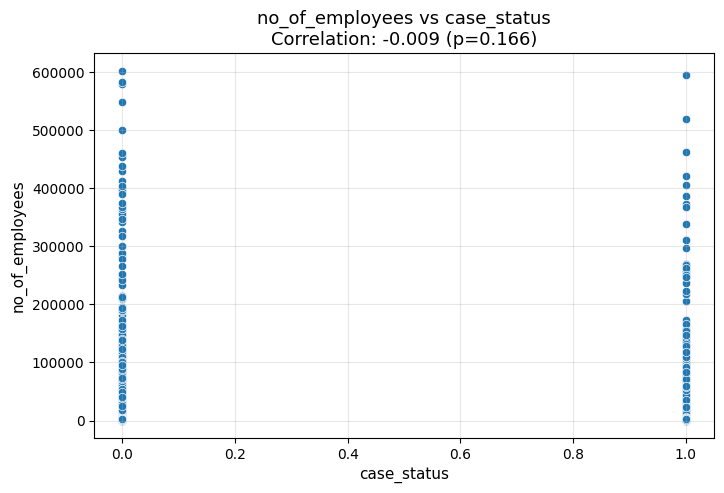

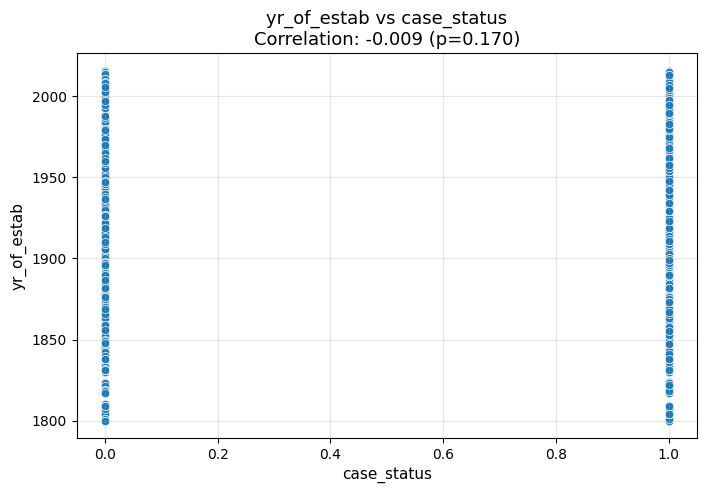

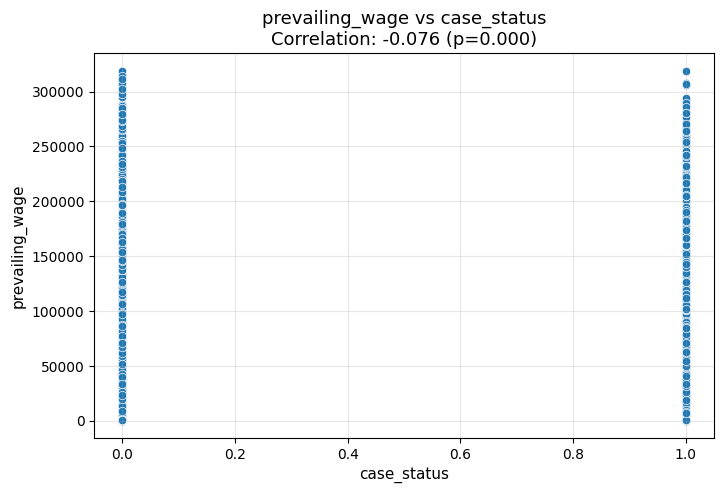

In [105]:
for col in numerical_features:
    target_and_features_numeric(df, "case_status", col)

In [100]:
def heatmap(df):
    plt.figure(figsize=(10,4))
    sns.heatmap(
        df[numerical_features].corr(), annot=True, vmin=-1, vmax=1, fmt =".2f", cmap="Accent"
    )
    plt.tight_layout()
    plt.show()

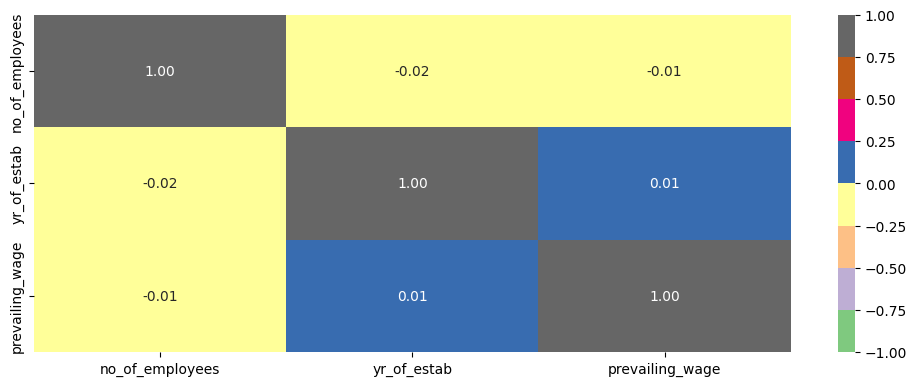

In [101]:
heatmap(df)

In [108]:
def features_target(df, predictor, target):
    fig, axs = plt.subplots(2,2, figsize=(12,8))
    target_unique = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_unique[0]))
    sns.histplot(
        data=df[df[target] == target_unique[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_unique[1]))
    sns.histplot(
        data=df[df[target] == target_unique[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [106]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

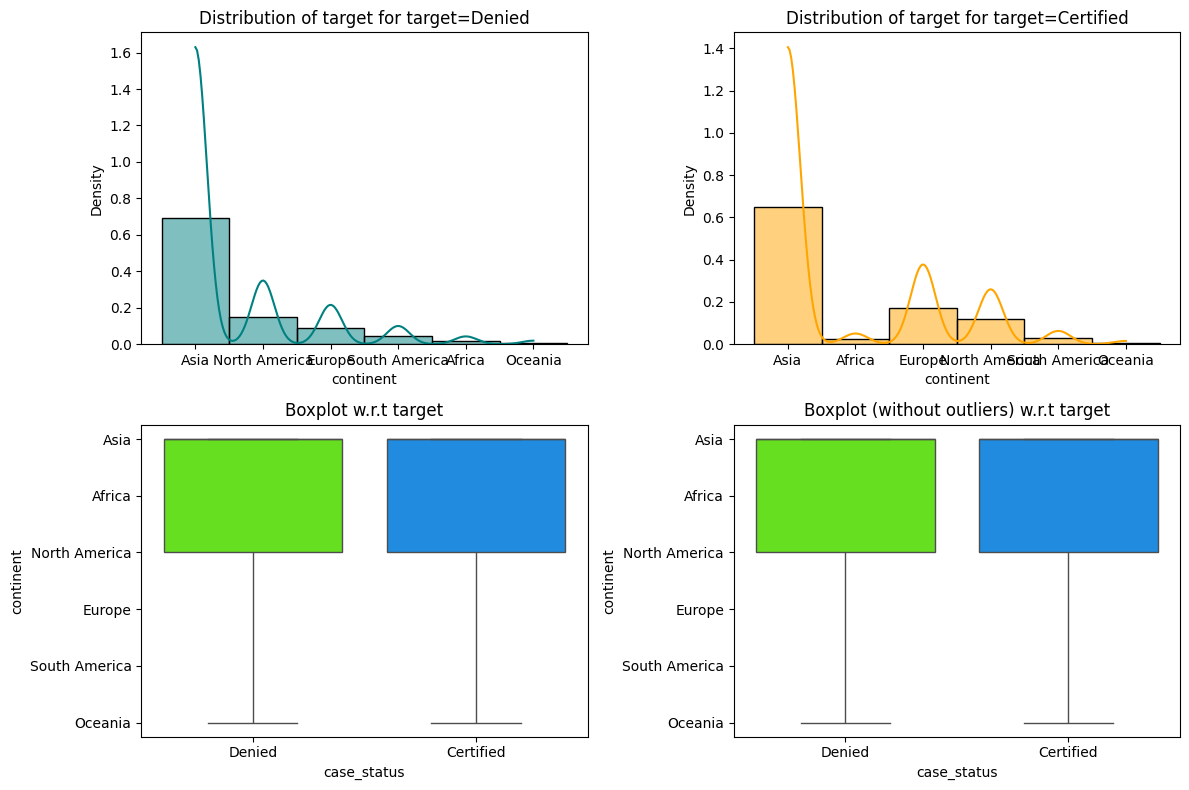

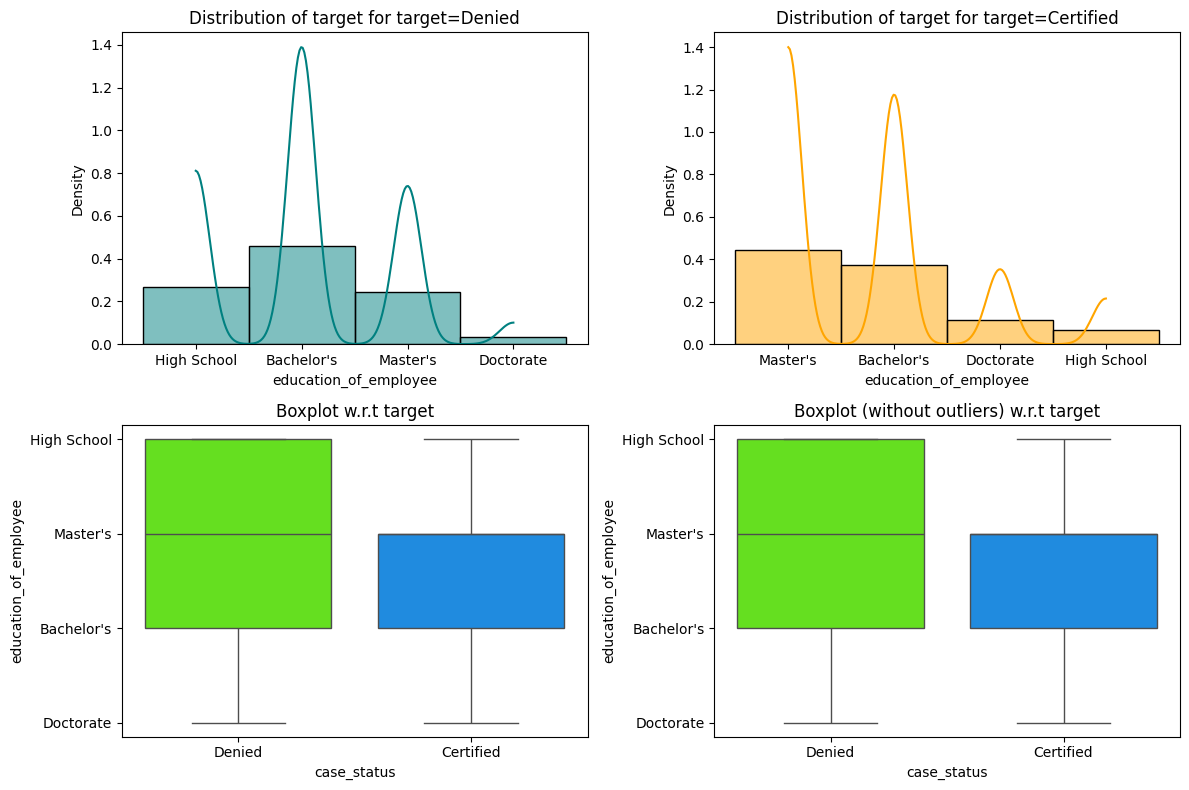

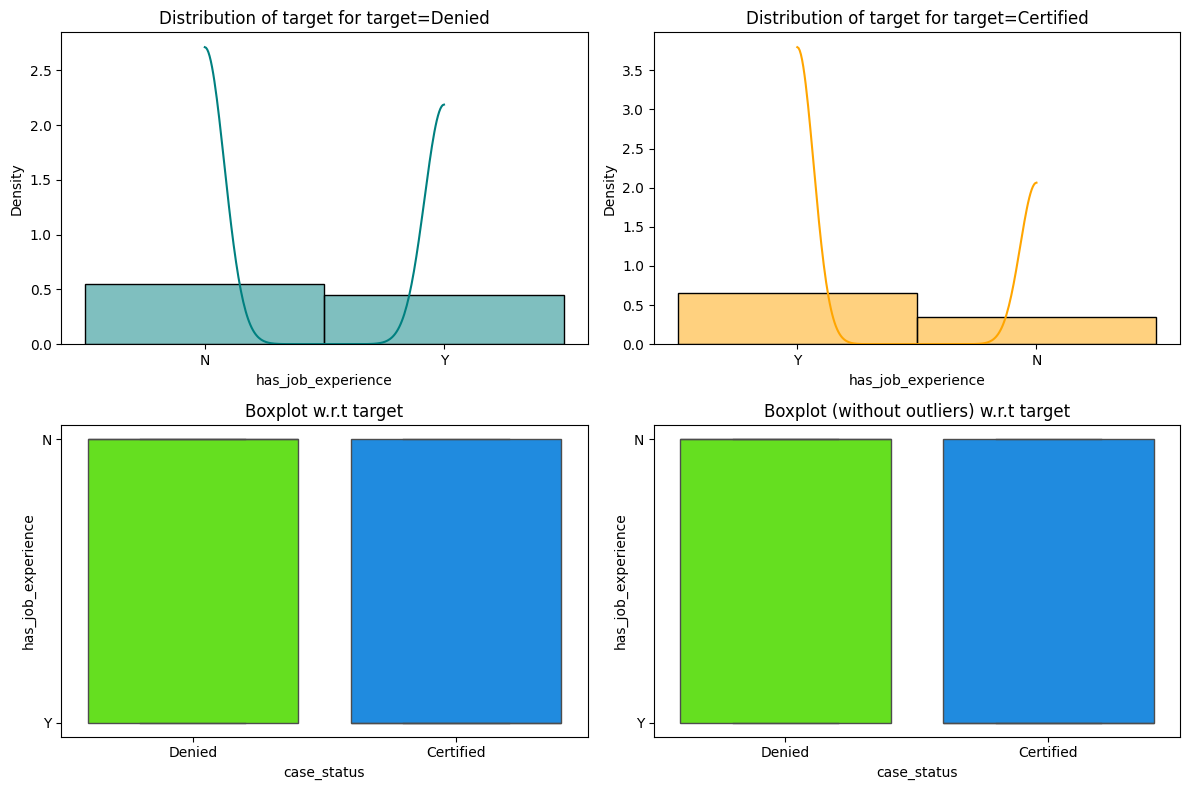

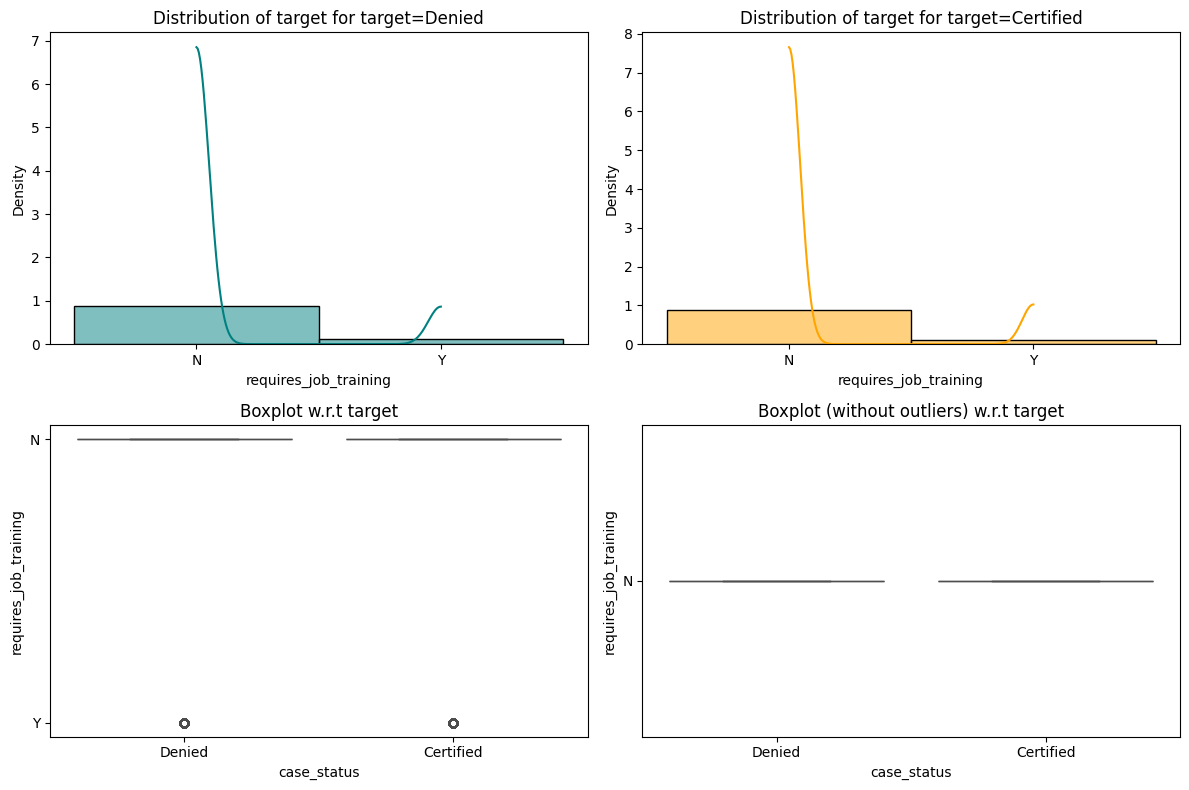

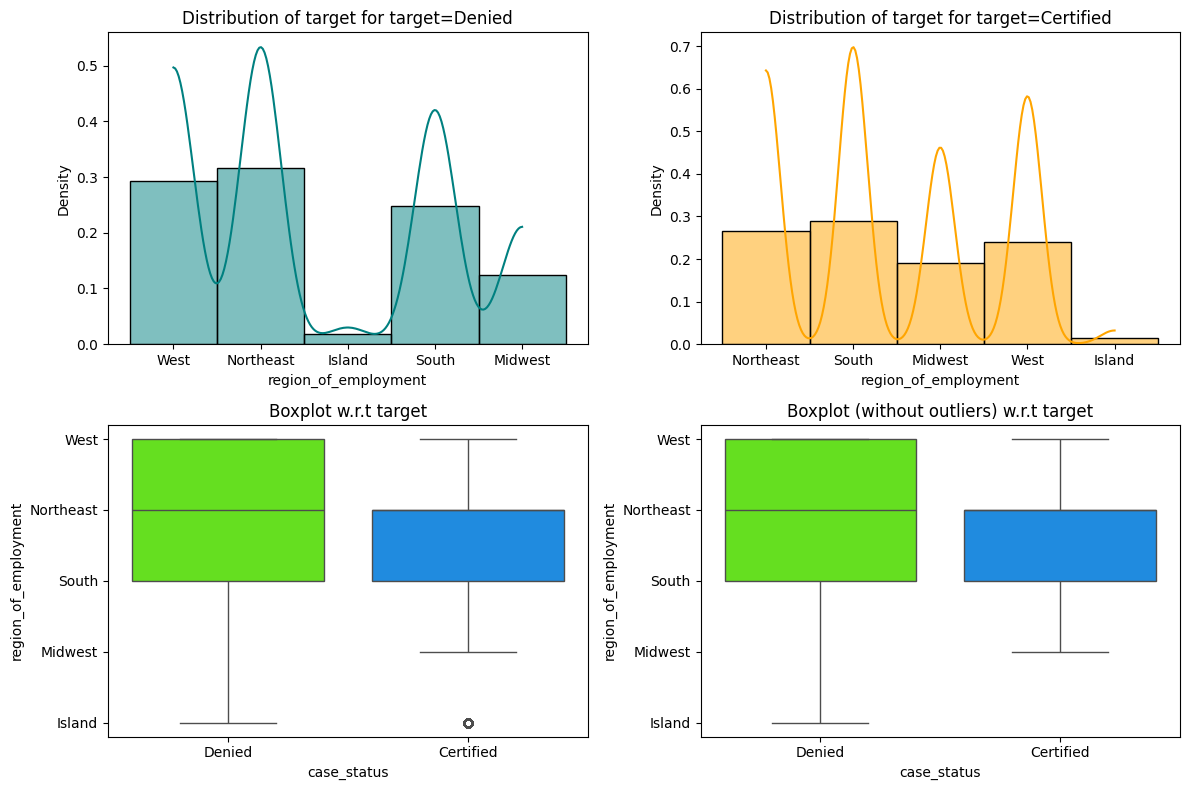

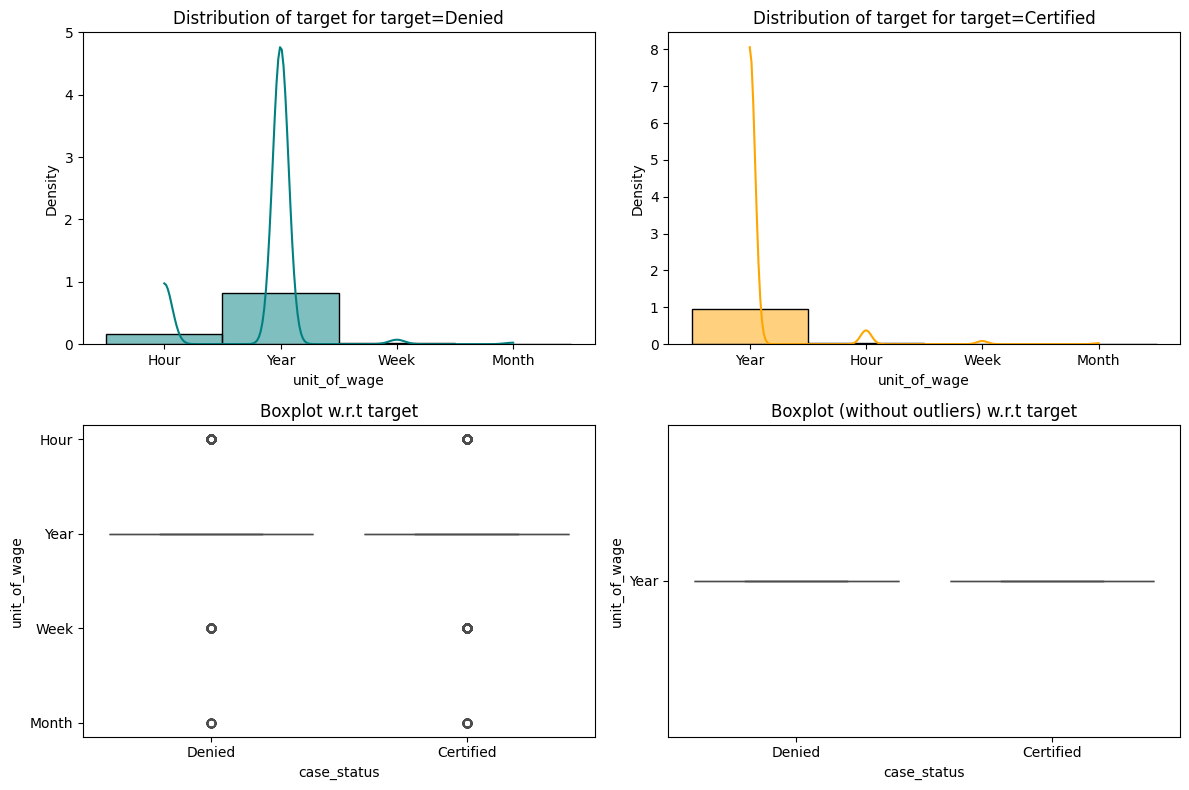

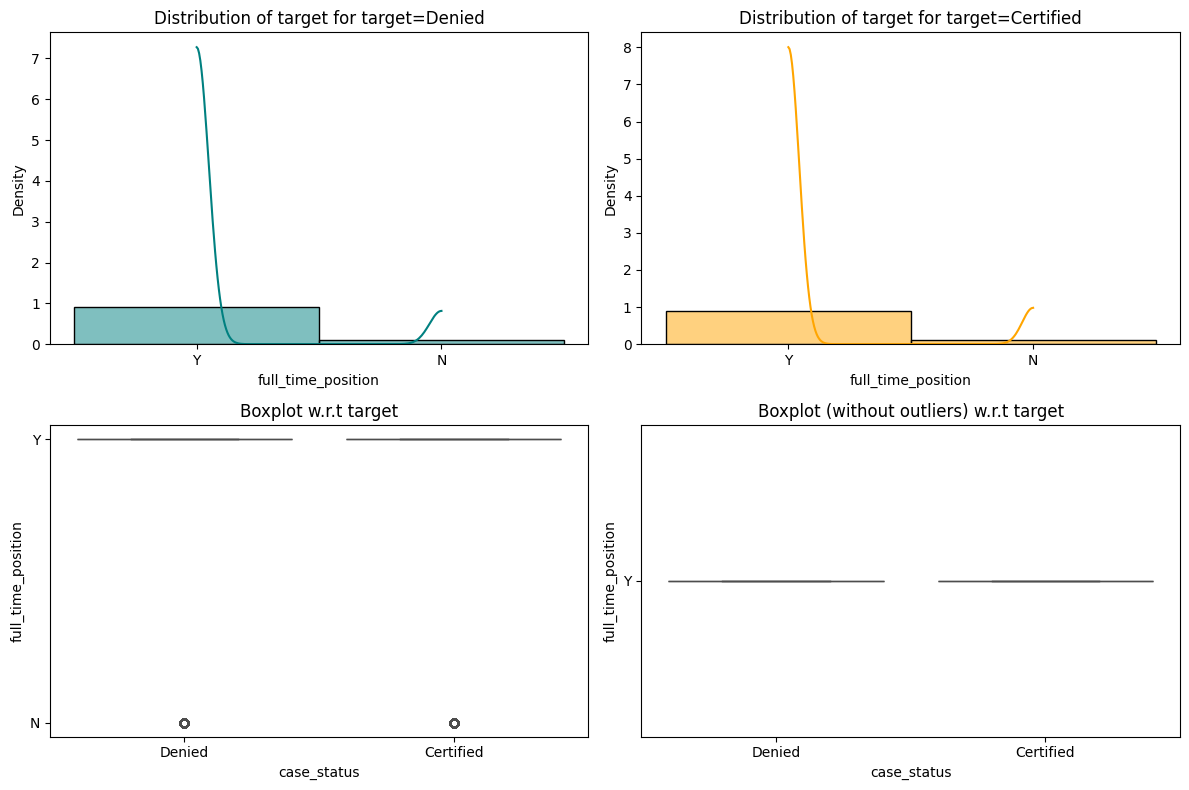

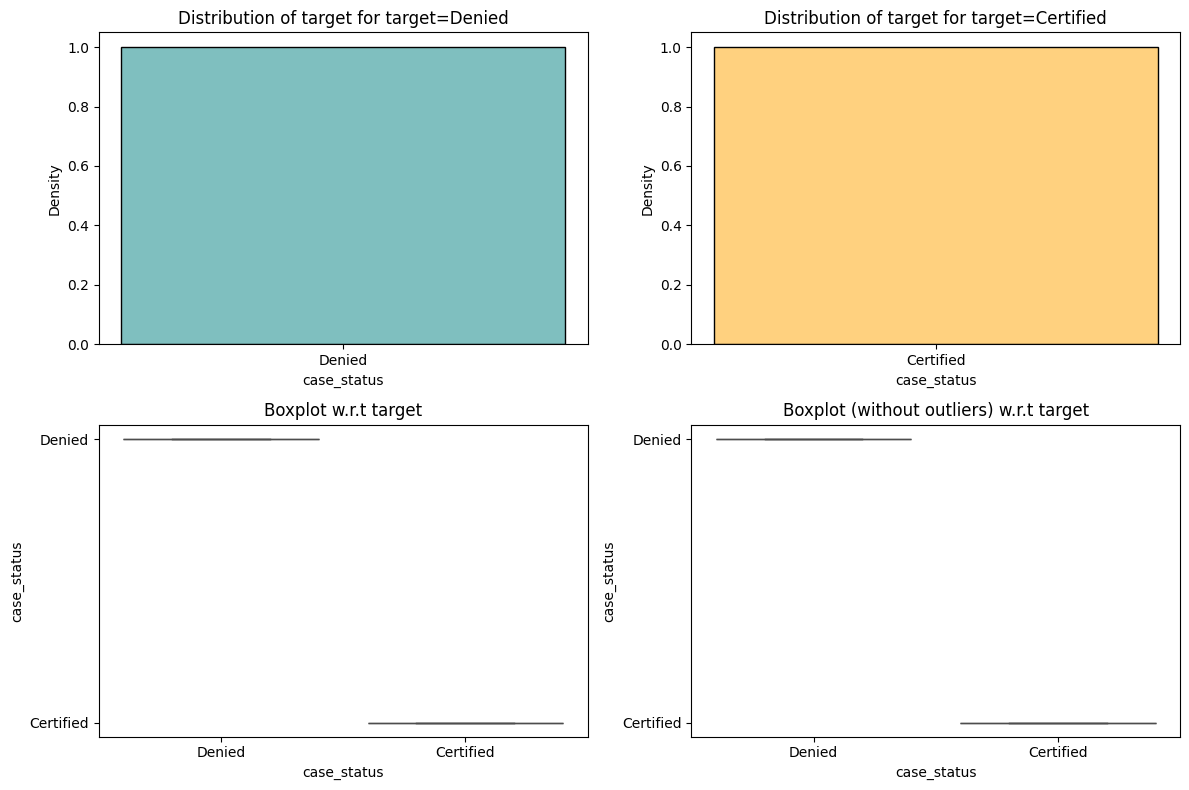

In [110]:
for col in categorical_features:
    features_target(df, predictor= col, target="case_status")

### Trivariate Analysis